# Game of Life


The [Game of Life](http://en.wikipedia.org/wiki/Conway's_Game_of_Life) (GoF) is a cellular automaton devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

* Any live cell with fewer than two live neighbours dies, as if by underpopulation.
* Any live cell with more than three live neighbours dies, as if by overcrowding.
* Any live cell with two or three live neighbours lives, unchanged, to the next generation.
* Any dead cell with exactly three live neighbours becomes a live cell.

The initial pattern (generation 0) constitutes the "seed" of the system.
Time is considered discrete, and each time step (sometimes called a tick), the previous rules are applied simultaneously to every cell in the grid; "births" and "deaths" are immediate.
Each generation is a pure function of the previous generation alone.


# Assignments

* Begin by implementing the GoF's rules and create few examples with basic seeds in small dimensions. Hint: create `.gif` animations from sequences of still `.png` images
* Implement examples of the three categories of patterns *still lifes*, *oscillators* and *spaceships* (check the [wiki link](http://en.wikipedia.org/wiki/Conway's_Game_of_Life))
* Analyse the evolutions of these patterns in terms of frequency (the number of cycles required to return to the original configuration, if any), occupancy (how many alive cells there are at every step of the game), replication or heat (the average number of cells that change state at each generation), speed (if applicable), etc.
* Increase the size of the GoF's world and play with more advanced and complex patterns

Here we have defined the rules of GoF in our function that takes the grid (initial seed) and number of generations which is how many levels we want to proceed.

In [1]:
import numpy as np
import PIL as p
from PIL import Image
from IPython.display import Image, display

def game_of_life(grid, num_generations):
    generations = [grid]
    for _ in range(num_generations):
        # Create a copy of the current grid
        next_grid = np.copy(grid)

        # Iterate over each cell in the grid
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                # Count the number of live neighbors
                live_neighbors = np.sum(grid[max(0, i-1):min(i+2, grid.shape[0]), max(0, j-1):min(j+2, grid.shape[1])]) - grid[i, j]

                # Apply the rules of the Game of Life
                if grid[i, j] == 1 and (live_neighbors < 2 or live_neighbors > 3):
                    next_grid[i, j] = 0
                elif grid[i, j] == 0 and live_neighbors == 3:
                    next_grid[i, j] = 1

        # Update the grid for the next generation
        grid = next_grid
        generations.append(grid)

    return generations


Defined a function that takes the GoF function paramateres as well as

In [2]:
def visualize_and_save(pattern, num_generations, filename_prefix):
    generations = game_of_life(pattern, num_generations)

    # Export each generation as a .png image
    for i, generation in enumerate(generations):
        image = p.Image.fromarray((generation * 255).astype(np.uint8))
        image.save(f'{filename_prefix}/result_generation_{i}.png')

    # Create a sequence with .gif format
    images = [p.Image.open(f'{filename_prefix}/result_generation_{i}.png') for i in range(len(generations))]
    images[0].save(f'{filename_prefix}/result_animation.gif', format="GIF", append_images=images[1:], save_all=True, duration=400, loop=0)

    # Display the GIF
    display(Image(filename=f'{filename_prefix}/result_animation.gif', width=500))


A very simple (blinking in this case) example with 10 iterations.

In [3]:
# Example usage
grid = np.array([[0, 0, 0, 0, 0],
                 [0, 0, 1, 0, 0],
                 [0, 0, 1, 0, 0],
                 [0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0]])

visualize_and_save(grid,10,'grid')

Examples in *still lifes*, *oscillators* and *spaceships* categories:

## Assigment 2 :

In [4]:
block = np.array([[0,0,0,0],
                  [0,1,1,0],
                  [0,1,1,0],
                  [0,0,0,0]])
visualize_and_save(block, 10, 'still_life/block')

beehive = np.array([[0,0,0,0,0,0],
                    [0,0,1,1,0,0],
                    [0,1,0,0,1,0],
                    [0,0,1,1,0,0],
                    [0,0,0,0,0,0]])
visualize_and_save(beehive, 10, 'still_life/beehive')

loaf = np.array([[0,0,0,0,0,0],
                 [0,0,1,1,0,0],
                 [0,1,0,0,1,0],
                 [0,0,1,0,1,0],
                 [0,0,0,1,0,0],
                 [0,0,0,0,0,0]])
visualize_and_save(loaf, 10, 'still_life/loaf')




In [5]:
# Oscillators

blinker = np.array([[0,0,0,0,0],
                    [0,0,1,0,0],
                    [0,0,1,0,0],
                    [0,0,1,0,0],
                    [0,0,0,0,0]])
visualize_and_save(blinker, 10, 'oscillator/blinker')

toad = np.array([[0,0,0,0,0,0],
                 [0,0,0,0,0,0],
                 [0,0,1,1,1,0],
                 [0,1,1,1,0,0],
                 [0,0,0,0,0,0],
                 [0,0,0,0,0,0]])
visualize_and_save(toad, 10, 'oscillator/toad')

beacon = np.array([[0,0,0,0,0,0],
                   [0,1,1,0,0,0],
                   [0,1,1,0,0,0],
                   [0,0,0,1,1,0],
                   [0,0,0,1,1,0],
                   [0,0,0,0,0,0]])
visualize_and_save(beacon, 10, 'oscillator/beacon')


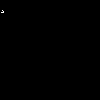

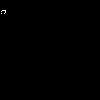

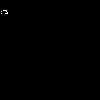

In [6]:
"""
This code defines three spaceships: glider, lwss, and mwss. Each spaceship is represented as a numpy array.
The `visualize_and_save` function is called for each spaceship to visualize and save the spaceship pattern.
"""

zero_matrix = np.zeros((100,100))


glider =np.array(
[
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 1]
])




lwss = np.array(
[               [0, 1, 1, 1, 1],
                [1, 0, 0, 0, 1],
                [0, 0, 0, 0, 1],
                [1, 0, 0, 1, 0]
])






hwss = np.array([[0, 0, 1, 1, 1, 1, 0],
                 [1, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0, 1],
                 [1, 0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0]])





def algorithms_space(algorithm,directory_name):
    zero_matrix[10:algorithm.shape[0]+10,1:algorithm.shape[1]+1] = algorithm
    visualize_and_save(zero_matrix, 100, directory_name)

    

algorithms_space(glider,'spaceship/glider')

algorithms_space(lwss,'spaceship/lwss')

algorithms_space(hwss,'spaceship/hwss')






## Assignment 4 : 
     1. gosper_glider_gun 

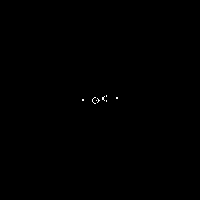

In [7]:
def gosper_glider_gun():
    gun = np.zeros((11, 38), dtype=int)

    gun[5][1] = gun[5][2] = 1
    gun[6][1] = gun[6][2] = 1

    gun[3][13] = gun[3][14] = 1
    gun[4][12] = gun[4][16] = 1
    gun[5][11] = gun[5][17] = 1
    gun[6][11] = gun[6][15] = gun[6][17] = gun[6][18] = 1
    gun[7][11] = gun[7][17] = 1
    gun[8][12] = gun[8][16] = 1
    gun[9][13] = gun[9][14] = 1

    gun[1][25] = 1
    gun[2][23] = gun[2][25] = 1
    gun[3][21] = gun[3][22] = 1
    gun[4][21] = gun[4][22] = 1
    gun[5][21] = gun[5][22] = 1
    gun[6][23] = gun[6][25] = 1
    gun[7][25] = 1

    gun[3][35] = gun[3][36] = 1
    gun[4][35] = gun[4][36] = 1

    return gun



def visualize_and_save_large_world(pattern, num_generations, filename_prefix):
    grid_size = (200, 200)
    zero_matrix = np.zeros(grid_size)
    center_row = (grid_size[0] - pattern.shape[0]) // 2
    center_col = (grid_size[1] - pattern.shape[1]) // 2
    zero_matrix[center_row:center_row + pattern.shape[0], center_col:center_col + pattern.shape[1]] = pattern

    visualize_and_save(zero_matrix, num_generations, filename_prefix)


gosper_glider_gun_pattern = gosper_glider_gun()
visualize_and_save_large_world(gosper_glider_gun_pattern, 150, 'pattern examples/gosper_glider_gun')    

        2. pulsar_oscillator 

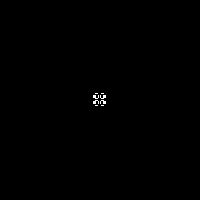

In [8]:
def pulsar_oscillator():
    pulsar = np.zeros((15, 15), dtype=int)

    pulsar[1][3:6] = pulsar[1][9:12] = pulsar[3][1:4] = pulsar[3][6] = pulsar[3][8] = pulsar[3][11:14] = 1
    pulsar[4][1:4] = pulsar[4][6] = pulsar[4][8] = pulsar[4][11:14] = 1
    pulsar[5][1:4] = pulsar[5][6] = pulsar[5][8] = pulsar[5][11:14] = 1
    pulsar[6][3:6] = pulsar[6][9:12] = pulsar[8][3:6] = pulsar[8][9:12] = 1
    pulsar[9][1:4] = pulsar[9][6] = pulsar[9][8] = pulsar[9][11:14] = 1
    pulsar[10][1:4] = pulsar[10][6] = pulsar[10][8] = pulsar[10][11:14] = 1
    pulsar[11][1:4] = pulsar[11][6] = pulsar[11][8] = pulsar[11][11:14] = 1
    pulsar[13][3:6] = pulsar[13][9:12] = 1

    return pulsar

# Example usage
pulsar_pattern = pulsar_oscillator()
visualize_and_save_large_world(pulsar_pattern, 300, 'pattern examples/pulsar_oscillator')


     3.acorn_pattern

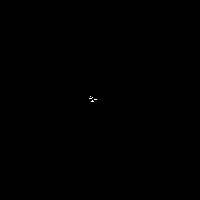

In [9]:
def acorn_pattern():
    acorn = np.zeros((7, 21), dtype=int)

    acorn[0][1] = 1
    acorn[1][3] = 1
    acorn[2][0:3] = acorn[3][5:8] = acorn[4][3] = acorn[5][2:5] = 1

    return acorn

# Example usage
acorn = acorn_pattern()
visualize_and_save_large_world(acorn, 300, 'pattern examples/acorn_pattern')
